# <center>**<u>Unsupervised Learning with Scikit-Learn</u>**</center>
<br><br>

![Scikit-Learn Logo](notebook_images/scikit-learn_unsupervisedLearning/scikit-learn_logo.jpg)


---
- Datasets for this notebook can be found at the following links:
    - [Stock Data](https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv)

    - [Eurovision Data](https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv)

    - [Fish Data](https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv)

    - [Grains Data](https://assets.datacamp.com/production/repositories/655/datasets/bb87f0bee2ac131042a01307f7d7e3d4a38d21ec/Grains.zip)

    - [LCD Digits Data](https://assets.datacamp.com/production/repositories/655/datasets/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv)

    - [Musical Artists Data](https://assets.datacamp.com/production/repositories/655/datasets/c974f2f2c4834958cbe5d239557fbaf4547dc8a3/Musical%20artists.zip)

    - [Wikipedia Data](https://assets.datacamp.com/production/repositories/655/datasets/8e2fbb5b8240c06602336f2148f3c42e317d1fdb/Wikipedia%20articles.zip)

    - [Wine Data](https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv)

---
- "Unsupervised Learning" is a machine learning technique that involves analyzing and extracting patterns from unlabeled data without predefined categories or target variables. It aims to discover hidden structures, relationships, and insights within the data. Common unsupervised learning algorithms include clustering, dimensionality reduction, and anomaly detection. These methods help in understanding the inherent structure of the data, identifying groups or clusters, reducing data complexity, and detecting outliers or anomalies. Unsupervised learning is widely used in various domains such as customer segmentation, image recognition, recommendation systems, and data compression.
---


#### Imports et cetera

In [2]:
#%load_ext cudf.pandas

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer, normalize, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import pearsonr


import pandas as pd
#import cudf

import numpy as np
import matplotlib.pyplot as plt

# **1. Clustering for Dataset Exploration**

## Using KMeans to Identify Clusters

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- one use of unsupervised learning is identifying clustering in datasets. First, we will use pyplot to plot a graph of data fitted with unsupervised learning algorithm `KMeans`that uses K-means clustering  to group similar data points together based on their features
- create a KMeans instances with `KMeans()`  called `model_KN` to find three clusters in the data given below--to specify the number of clusters, use the keyword argument `n_clusters`
- fit `model_KN` to the array `some_points` defined below with the method `.fit()`
- then make predictions with the method `.predict()`to predict the label values given in the other array defined below and called `some_points_more`, and assign the results to the variable `labels_KN`
- assign column `0` of `some_points_more`to `x_spm` and column `1` to `y_spm`
- create a scatter plot of `x_spm` and `y_spm`, specifying `c=labels_KN`and `alpha=0.5`
- compute the coordinates of the *centroids* for each cluster using the `model_KN.cluster_centers_` attribute and assign to `centroids_KN`
    - ***centroids*** are defined as the mean position of all the points in a cluster
- assign column `0` of `centroids_KN` to `x_centroids` and column `1` to `y_centroids`
- create a scatter plot of `x_centroids` and `y_centroids`, specifying the marker as`marker='D'`(diamond)  and the size as `s=50`
- ***don't forget to show the plots with `plt.show()`*** 	&#128200;

In [3]:
# data arrays for example
some_points = np.array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]])

some_points_more = np.array([[ 4.00233332e-01, -1.26544471e+00],
       [ 8.03230370e-01,  1.28260167e+00],
       [-1.39507552e+00,  5.57292921e-02],
       [-3.41192677e-01, -1.07661994e+00],
       [ 1.54781747e+00,  1.40250049e+00],
       [ 2.45032018e-01, -4.83442328e-01],
       [ 1.20706886e+00,  8.88752605e-01],
       [ 1.25132628e+00,  1.15555395e+00],
       [ 1.81004415e+00,  9.65530731e-01],
       [-1.66963401e+00, -3.08103509e-01],
       [-7.17482105e-02, -9.37939700e-01],
       [ 6.82631927e-01,  1.10258160e+00],
       [ 1.09039598e+00,  1.43899529e+00],
       [-1.67645414e+00, -5.04557049e-01],
       [-1.84447804e+00,  4.52539544e-02],
       [ 1.24234851e+00,  1.02088661e+00],
       [-1.86147041e+00,  6.38645811e-03],
       [-1.46044943e+00,  1.53252383e-01],
       [ 4.98981817e-01,  8.98006058e-01],
       [ 9.83962244e-01,  1.04369375e+00],
       [-1.83136742e+00, -1.63632835e-01],
       [ 1.30622617e+00,  1.07658717e+00],
       [ 3.53420328e-01, -7.51320218e-01],
       [ 1.13957970e+00,  1.54503860e+00],
       [ 2.93995694e-01, -1.26135005e+00],
       [-1.14558225e+00, -3.78709636e-02],
       [ 1.18716105e+00,  6.00240663e-01],
       [-2.23211946e+00,  2.30475094e-01],
       [-1.28320430e+00, -3.93314568e-01],
       [ 4.94296696e-01, -8.83972009e-01],
       [ 6.31834930e-02, -9.11952228e-01],
       [ 9.35759539e-01,  8.66820685e-01],
       [ 1.58014721e+00,  1.03788392e+00],
       [ 1.06304960e+00,  1.02706082e+00],
       [-1.39732536e+00, -5.05162249e-01],
       [-1.09935240e-01, -9.08113619e-01],
       [ 1.17346758e+00,  9.47501092e-01],
       [ 9.20084511e-01,  1.45767672e+00],
       [ 5.82658956e-01, -9.00086832e-01],
       [ 9.52772328e-01,  8.99042386e-01],
       [-1.37266956e+00, -3.17878215e-02],
       [ 2.12706760e-02, -7.07614194e-01],
       [ 3.27049052e-01, -5.55998107e-01],
       [-1.71590267e+00,  2.15222266e-01],
       [ 5.12516209e-01, -7.60128245e-01],
       [ 1.13023469e+00,  7.22451122e-01],
       [-1.43074310e+00, -3.42787511e-01],
       [-1.82724625e+00,  1.17657775e-01],
       [ 1.41801350e+00,  1.11455080e+00],
       [ 1.26897304e+00,  1.41925971e+00],
       [ 8.04076494e-01,  1.63988557e+00],
       [ 8.34567752e-01,  1.09956689e+00],
       [-1.24714732e+00, -2.23522320e-01],
       [-1.29422537e+00,  8.18770024e-02],
       [-2.27378316e-01, -4.13331387e-01],
       [ 2.18830387e-01, -4.68183120e-01],
       [-1.22593414e+00,  2.55599147e-01],
       [-1.31294033e+00, -4.28892070e-01],
       [-1.33532382e+00,  6.52053776e-01],
       [-3.01100233e-01, -1.25156451e+00],
       [ 2.02778356e-01, -9.05277445e-01],
       [ 1.01357784e+00,  1.12378981e+00],
       [ 8.18324394e-01,  8.60841257e-01],
       [ 1.26181556e+00,  1.46613744e+00],
       [ 4.64867724e-01, -7.97212459e-01],
       [ 3.60908898e-01,  8.44106720e-01],
       [-2.15098310e+00, -3.69583937e-01],
       [ 1.05005281e+00,  8.74181364e-01],
       [ 1.06580074e-01, -7.49268153e-01],
       [-1.73945723e+00,  2.52183577e-01],
       [-1.12017687e-01, -6.52469788e-01],
       [ 5.16618951e-01, -6.41267582e-01],
       [ 3.26621787e-01, -8.80608015e-01],
       [ 1.09017759e+00,  1.10952558e+00],
       [ 3.64459576e-01, -6.94215622e-01],
       [-1.90779318e+00,  1.87383674e-01],
       [-1.95601829e+00,  1.39959126e-01],
       [ 3.18541701e-01, -4.05271704e-01],
       [ 7.36512699e-01,  1.76416255e+00],
       [-1.44175162e+00, -5.72320429e-02],
       [ 3.21757168e-01, -5.34283821e-01],
       [-1.37317305e+00,  4.64484644e-02],
       [ 6.87225910e-02, -1.10522944e+00],
       [ 9.59314218e-01,  6.52316210e-01],
       [-1.62641919e+00, -5.62423280e-01],
       [ 1.06788305e+00,  7.29260482e-01],
       [-1.79643547e+00, -9.88307418e-01],
       [-9.88628377e-02, -6.81198092e-02],
       [-1.05135700e-01,  1.17022143e+00],
       [ 8.79964699e-01,  1.25340317e+00],
       [ 9.80753407e-01,  1.15486539e+00],
       [-8.33224966e-02, -9.24844368e-01],
       [ 8.48759673e-01,  1.09397425e+00],
       [ 1.32941649e+00,  1.13734563e+00],
       [ 3.23788068e-01, -7.49732451e-01],
       [-1.52610970e+00, -2.49016929e-01],
       [-1.48598116e+00, -2.68828608e-01],
       [-1.80479553e+00,  1.87052700e-01],
       [-2.01907347e+00, -4.49511651e-01],
       [ 2.87202402e-01, -6.55487415e-01],
       [ 8.22295102e-01,  1.38443234e+00],
       [-3.56997036e-02, -8.01825807e-01],
       [-1.66955440e+00, -1.38258505e-01],
       [-1.78226821e+00,  2.93353033e-01],
       [ 7.25837138e-01, -6.23374024e-01],
       [ 3.88432593e-01, -7.61283497e-01],
       [ 1.49002783e+00,  7.95678671e-01],
       [ 6.55423228e-04, -7.40580702e-01],
       [-1.34533116e+00, -4.75629937e-01],
       [-8.03845106e-01, -3.09943013e-01],
       [-2.49041295e-01, -1.00662418e+00],
       [-1.41095118e+00, -7.06744127e-02],
       [-1.75119594e+00, -3.00491336e-01],
       [-1.27942724e+00,  1.73774600e-01],
       [ 3.35028183e-01,  6.24761151e-01],
       [ 1.16819649e+00,  1.18902251e+00],
       [ 7.15210457e-01,  9.26077419e-01],
       [ 1.30057278e+00,  9.16349565e-01],
       [-1.21697008e+00,  1.10039477e-01],
       [-1.70707935e+00, -5.99659536e-02],
       [ 1.20730655e+00,  1.05480463e+00],
       [ 1.86896009e-01, -9.58047234e-01],
       [ 8.03463471e-01,  3.86133140e-01],
       [-1.73486790e+00, -1.49831913e-01],
       [ 1.31261499e+00,  1.11802982e+00],
       [ 4.04993148e-01, -5.10900347e-01],
       [-1.93267968e+00,  2.20764694e-01],
       [ 6.56004799e-01,  9.61887161e-01],
       [-1.40588215e+00,  1.17134403e-01],
       [-1.74306264e+00, -7.47473959e-02],
       [ 5.43745412e-01,  1.47209224e+00],
       [-1.97331669e+00, -2.27124493e-01],
       [ 1.53901171e+00,  1.36049081e+00],
       [-1.48323452e+00, -4.90302063e-01],
       [ 3.86748484e-01, -1.26173400e+00],
       [ 1.17015716e+00,  1.18549415e+00],
       [-8.05381721e-02, -3.21923627e-01],
       [-6.82273156e-02, -8.52825887e-01],
       [ 7.13500028e-01,  1.27868520e+00],
       [-1.85014378e+00, -5.03490558e-01],
       [ 6.36085266e-02, -1.41257040e+00],
       [ 1.52966062e+00,  9.66056572e-01],
       [ 1.62165714e-01, -1.37374843e+00],
       [-3.23474497e-01, -7.06620269e-01],
       [-1.51768993e+00,  1.87658302e-01],
       [ 8.88895911e-01,  7.62237161e-01],
       [ 4.83164032e-01,  8.81931869e-01],
       [-5.52997766e-02, -7.11305016e-01],
       [-1.57966441e+00, -6.29220313e-01],
       [ 5.51308645e-02, -8.47206763e-01],
       [-2.06001582e+00,  5.87697787e-02],
       [ 1.11810855e+00,  1.30254175e+00],
       [ 4.87016164e-01, -9.90143937e-01],
       [-1.65518042e+00, -1.69386383e-01],
       [-1.44349738e+00,  1.90299243e-01],
       [-1.70074547e-01, -8.26736022e-01],
       [-1.82433979e+00, -3.07814626e-01],
       [ 1.03093485e+00,  1.26457691e+00],
       [ 1.64431169e+00,  1.27773115e+00],
       [-1.47617693e+00,  2.60783872e-02],
       [ 1.00953067e+00,  1.14270181e+00],
       [-1.45285636e+00, -2.55216207e-01],
       [-1.74092917e+00, -8.34443177e-02],
       [ 1.22038299e+00,  1.28699961e+00],
       [ 9.16925397e-01,  7.32070275e-01],
       [-1.60754185e-03, -7.26375571e-01],
       [ 8.93841238e-01,  8.41146643e-01],
       [ 6.33791961e-01,  1.00915134e+00],
       [-1.47927075e+00, -6.99781936e-01],
       [ 5.44799374e-02, -1.06441970e+00],
       [-1.51935568e+00, -4.89276929e-01],
       [ 2.89939026e-01, -7.73145523e-01],
       [-9.68154061e-03, -1.13302207e+00],
       [ 1.13474639e+00,  9.71541744e-01],
       [ 5.36421406e-01, -8.47906388e-01],
       [ 1.14759864e+00,  6.89915205e-01],
       [ 5.73291902e-01,  7.90802710e-01],
       [ 2.12377397e-01, -6.07569808e-01],
       [ 5.26579548e-01, -8.15930264e-01],
       [-2.01831641e+00,  6.78650740e-02],
       [-2.35512624e-01, -1.08205132e+00],
       [ 1.59274780e-01, -6.00717261e-01],
       [ 2.28120356e-01, -1.16003549e+00],
       [-1.53658378e+00,  8.40798808e-02],
       [ 1.13954609e+00,  6.31782001e-01],
       [ 1.01119255e+00,  1.04360805e+00],
       [-1.42039867e-01, -4.81230337e-01],
       [-2.23120182e+00,  8.49162905e-02],
       [ 1.25554811e-01, -1.01794793e+00],
       [-1.72493509e+00, -6.94426177e-01],
       [-1.60434630e+00,  4.45550868e-01],
       [ 7.37153979e-01,  9.26560744e-01],
       [ 6.72905271e-01,  1.13366030e+00],
       [ 1.20066456e+00,  7.26273093e-01],
       [ 7.58747209e-02, -9.83378326e-01],
       [ 1.28783262e+00,  1.18088601e+00],
       [ 1.06521930e+00,  1.00714746e+00],
       [ 1.05871698e+00,  1.12956519e+00],
       [-1.12643410e+00,  1.66787744e-01],
       [-1.10157218e+00, -3.64137806e-01],
       [ 2.35118217e-01, -1.39769949e-01],
       [ 1.13853795e+00,  1.01018519e+00],
       [ 5.31205654e-01, -8.81990792e-01],
       [ 4.33085936e-01, -7.64059042e-01],
       [-4.48926156e-03, -1.30548411e+00],
       [-1.76348589e+00, -4.97430739e-01],
       [ 1.36485681e+00,  5.83404699e-01],
       [ 5.66923900e-01,  1.51391963e+00],
       [ 1.35736826e+00,  6.70915318e-01],
       [ 1.07173397e+00,  6.11990884e-01],
       [ 1.00106915e+00,  8.93815326e-01],
       [ 1.33091007e+00,  8.79773879e-01],
       [-1.79603740e+00, -3.53883973e-02],
       [-1.27222979e+00,  4.00156642e-01],
       [ 8.47480603e-01,  1.17032364e+00],
       [-1.50989129e+00, -7.12318330e-01],
       [-1.24953576e+00, -5.57859730e-01],
       [-1.27717973e+00, -5.99350550e-01],
       [-1.81946743e+00,  7.37057673e-01],
       [ 1.19949867e+00,  1.56969386e+00],
       [-1.25543847e+00, -2.33892826e-01],
       [-1.63052058e+00,  1.61455865e-01],
       [ 1.10611305e+00,  7.39698224e-01],
       [ 6.70193192e-01,  8.70567001e-01],
       [ 3.69670156e-01, -6.94645306e-01],
       [-1.26362293e+00, -6.99249285e-01],
       [-3.66687507e-01, -1.35310260e+00],
       [ 2.44032147e-01, -6.59470793e-01],
       [-1.27679142e+00, -4.85453412e-01],
       [ 3.77473612e-02, -6.99251605e-01],
       [-2.19148539e+00, -4.91199500e-01],
       [-2.93277777e-01, -5.89488212e-01],
       [-1.65737397e+00, -2.98337786e-01],
       [ 7.36638861e-01,  5.78037057e-01],
       [ 1.13709081e+00,  1.30119754e+00],
       [-1.44146601e+00,  3.13934680e-02],
       [ 5.92360708e-01,  1.22545114e+00],
       [ 6.51719414e-01,  4.92674894e-01],
       [ 5.94559139e-01,  8.25637315e-01],
       [-1.87900722e+00, -5.21899626e-01],
       [ 2.15225041e-01, -1.28269851e+00],
       [ 4.99145965e-01, -6.70268634e-01],
       [-1.82954176e+00, -3.39269731e-01],
       [ 7.92721403e-01,  1.33785606e+00],
       [ 9.54363372e-01,  9.80396626e-01],
       [-1.35359846e+00,  1.03976340e-01],
       [ 1.05595062e+00,  8.07031927e-01],
       [-1.94311010e+00, -1.18976964e-01],
       [-1.39604137e+00, -3.10095976e-01],
       [ 1.28977624e+00,  1.01753365e+00],
       [-1.59503139e+00, -5.40574609e-01],
       [-1.41994046e+00, -3.81032569e-01],
       [-2.35569801e-02, -1.10133702e+00],
       [-1.26038568e+00, -6.93273886e-01],
       [ 9.60215981e-01, -8.11553694e-01],
       [ 5.51803308e-01, -1.01793176e+00],
       [ 3.70185085e-01, -1.06885468e+00],
       [ 8.25529207e-01,  8.77007060e-01],
       [-1.87032595e+00,  2.87507199e-01],
       [-1.56260769e+00, -1.89196712e-01],
       [-1.26346548e+00, -7.74725237e-01],
       [-6.33800421e-02, -7.59400611e-01],
       [ 8.85298280e-01,  8.85620519e-01],
       [-1.43324686e-01, -1.16083678e+00],
       [-1.83908725e+00, -3.26655515e-01],
       [ 2.74709229e-01, -1.04546829e+00],
       [-1.45703573e+00, -2.91842036e-01],
       [-1.59048842e+00,  1.66063031e-01],
       [ 9.25549284e-01,  7.41406406e-01],
       [ 1.97245469e-01, -7.80703225e-01],
       [ 2.88401697e-01, -8.32425551e-01],
       [ 7.24141618e-01, -7.99149200e-01],
       [-1.62658639e+00, -1.80005543e-01],
       [ 5.84481588e-01,  1.13195640e+00],
       [ 1.02146732e+00,  4.59657799e-01],
       [ 8.65050554e-01,  9.57714887e-01],
       [ 3.98717766e-01, -1.24273147e+00],
       [ 8.62234892e-01,  1.10955561e+00],
       [-1.35999430e+00,  2.49942654e-02],
       [-1.19178505e+00, -3.82946323e-02],
       [ 1.29392424e+00,  1.10320509e+00],
       [ 1.25679630e+00, -7.79857582e-01],
       [ 9.38040302e-02, -5.53247258e-01],
       [-1.73512175e+00, -9.76271667e-02],
       [ 2.23153587e-01, -9.43474351e-01],
       [ 4.01989100e-01, -1.10963051e+00],
       [-1.42244158e+00,  1.81914703e-01],
       [ 3.92476267e-01, -8.78426277e-01],
       [ 1.25181875e+00,  6.93614996e-01],
       [ 1.77481317e-02, -7.20304235e-01],
       [-1.87752521e+00, -2.63870424e-01],
       [-1.58063602e+00, -5.50456344e-01],
       [-1.59589493e+00, -1.53932892e-01],
       [-1.01829770e+00,  3.88542370e-02],
       [ 1.24819659e+00,  6.60041803e-01],
       [-1.25551377e+00, -2.96172009e-02],
       [-1.41864559e+00, -3.58230179e-01],
       [ 5.25758326e-01,  8.70500543e-01],
       [ 5.55599988e-01,  1.18765072e+00],
       [ 2.81344439e-02, -6.99111314e-01]])

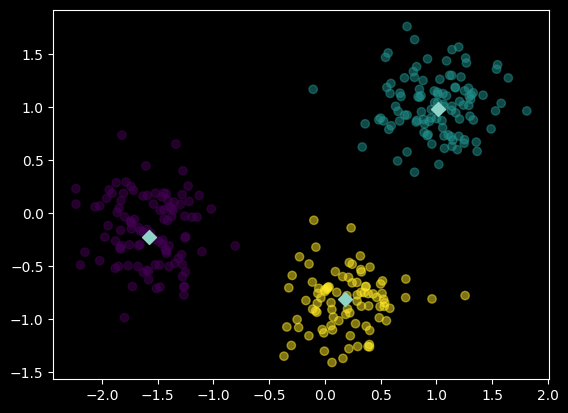

In [6]:
# scikit-learn imports used here
from sklearn.cluster import KMeans

# create KMeans instance with 3 clusters: model_KN
model_KN = KMeans(n_clusters=3)

# fit model_KN to some_points
model_KN.fit(some_points)

# predict cluster labels for some_points_more: labels:KN
labels_KN = model_KN.predict(some_points_more)

# assign columns of some_points_more
x_spm = some_points_more[:, 0]
y_spm = some_points_more[:, 1]


# create a scatterplot of x_spm and y_spm, using labels_KN to determine the color
plt.scatter(x_spm, y_spm, c=labels_KN, alpha=0.5)


# compute centroid coordinates
centroids_KN = model_KN.cluster_centers_

# assign columns of centroids_KN
x_centroids = centroids_KN[:, 0]
y_centroids = centroids_KN[:, 1]


# create a scatterplot of x_centroids and y_centroids, using a diamond marker and size of 50
plt.scatter(x_centroids, y_centroids, marker='D', s=50)

# show plots
plt.show()

![Consult the Graph! If you would, please.](notebook_images/scikit-learn_unsupervisedLearning/consult-da-graph_blank.jpg)
- Would you please consult the sweet centroids? &#128201;

## How to choose cluster number

#### Create two arrays out of a sample of `100` randomly selected lines from `seeds.csv`, where `varieties_array` is an array containing the variety names values and `seeds_array` is an array containuining the attribute values pertaining to each seed

In [15]:
seeds_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_unsupervised_learning/Grains/seeds.csv')
seeds_samples = seeds_df.sample(n=100)
varieties = seeds_samples[' variety']
varieties_array = varieties.values
seeds_attributes = seeds_samples[['area', ' perimeter', ' compactness', ' length', ' width', ' asymmetry_coefficient', ' groove_length']]
seeds_array = seeds_attributes.values

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- create a range of cluster numbers to test with `range(1, 6)`, call `ks`
- create an empty list for inertia values, call `inertias`
- iterate over `ks` and fit `model_inertias` with each `k`, append `model_inertias.inertia_` to `inertias`
- plot `ks` vs `inertias` with `-o`, `xlabel` as `"Number of Clusters, k"`, `ylabel` as `"Inertia"`; set `xticks` as `ks`

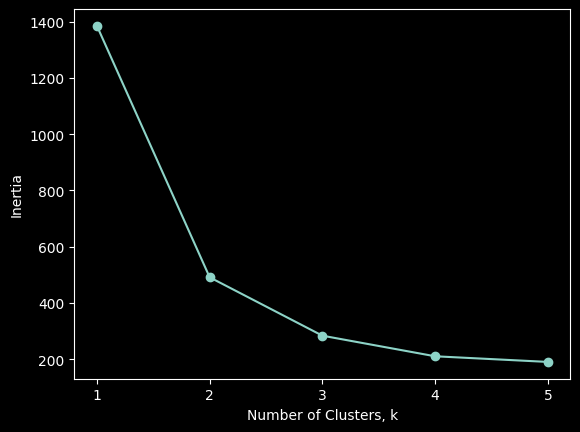

In [16]:
# scikit-learn imports used here
from sklearn.cluster import KMeans

# setup variables
ks = range(1,6)
inertias = []

#get inertias
for k in ks:
    model_inertias = KMeans(n_clusters=k)
    model_inertias.fit(seeds_array)
    inertias.append(model_inertias.inertia_)

#plot
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

- the inertia values stop moving much after `k=3`, so `3` is probably a good value for `n_clusters=`
- in fact, the data contains seeds from three distinct varieties of wheat, so `3` makes sense with the data

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- In this exercise we'll cluster the grain samples, then compare these to the grain varieties using cross-tabulation

---
- create a model, `model_KN_ct`, with `KMeans`, where `n_clusters=3`
- fit `model_KN_ct` with `seeds_array` and predict cluster labels with `model_KN_ct.fit_predict(seeds_array)`, assign to `seed_labels`
- create a DataFrame, `ct_df`, with `pd.DataFrame({'labels': seed_labels, 'varieties': varieties_array})`
- create a cross-tabulation with `pd.crosstab(index=ct_df['labels'], columns=ct_df['varieties'])`, assign to `ct`
- print `ct`

In [17]:
# scikit-learn  imports used here
from sklearn.cluster import KMeans

# create model: model_KN_ct
model_KN_ct = KMeans(n_clusters=3)

#fit model and predict labels: seed_labels
seed_labels = model_KN_ct.fit_predict(seeds_array)

# create DataFrame: ct_df
ct_df = pd.DataFrame({'labels': seed_labels, 'varieties': varieties_array})

# create cross-tabulation: ct
ct = pd.crosstab(index=ct_df['labels'], columns=ct_df['varieties'])

# print ct
print(ct)

varieties  Canadian  Kama  Rosa
labels                         
0                 4     0    29
1                 0    27     0
2                33     4     3


- our varieties seem to line up with the clusters, which is good

## Scaling Data for Clustering

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---
- in this exercise, we'll scale the features from the `fish.csv` dataset so that we can create more accurate clusters

---
- create a `fish_attributes` arrary and `fish_species` array from `fish.csv`
- create an instance of `StandardScaler()` called `scaler`
- create an instance of `KMeans()` with `n_clusters=4` called `kmeans`
- create a pipeline with `make_pipeline()` that chains `scaler` and `kmeans` called `pipeline`
-

In [ ]:
# scikit-learn imports used here
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# **2. Visualization with Hierarchical Clustering and t-SNE**

## t-SNE Visualization

- Recreate the two arrays from `seeds.csv` as done above; however, make  these changes:
    - Use `169` samples this time
    - Map the seed varieties' names to numerical values
        - i.e. "Kama" to `1`, "Rosa" to `2`, and "Canadian" to `3`

In [9]:
seeds_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_unsupervised_learning/Grains/seeds.csv')
seeds_samples = seeds_df.sample(n=169)
varieties = seeds_samples[' variety'].str.strip()
varieties_array = varieties.values
vcodes = varieties.map({'Kama': 1,'Rosa':2, 'Canadian': 3})
vcodes_array = vcodes.values
seeds_attributes = seeds_samples[['area', ' perimeter', ' compactness', ' length', ' width', ' asymmetry_coefficient', ' groove_length']]
seeds_array = seeds_attributes.values

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---


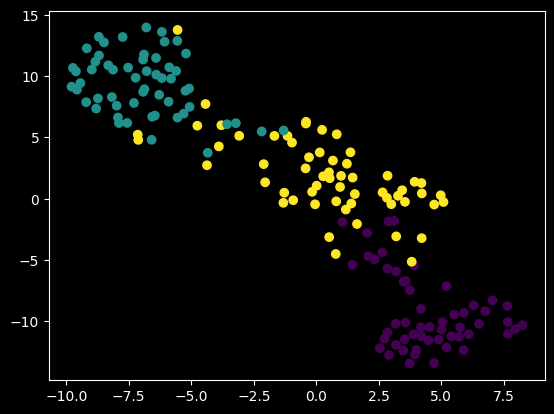

In [12]:
# scikit-learn imports used here
from sklearn.manifold import  TSNE

# create model: model_TSNE
model_TSNE = TSNE(learning_rate=333)

# fit_transform seeds_array: tsne_features
tsne_features = model_TSNE.fit_transform(seeds_array)

# select 0th feature: xs
xs = tsne_features[:, 0]
# select 1st feature: ys
ys = tsne_features[:, 1]


# plot scatter plot of xs and ys, coloring with varieties_array
plt.scatter(x=xs, y=ys, c=vcodes_array)
plt.show()

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---


In [13]:
stonkz_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_unsupervised_learning/company-stock-movements-2010-2015-incl.csv')
companies = stonkz_df['Company']
companies_array = companies.values
movements = stonkz_df.iloc[:, 1:]
movements_array = movements.values

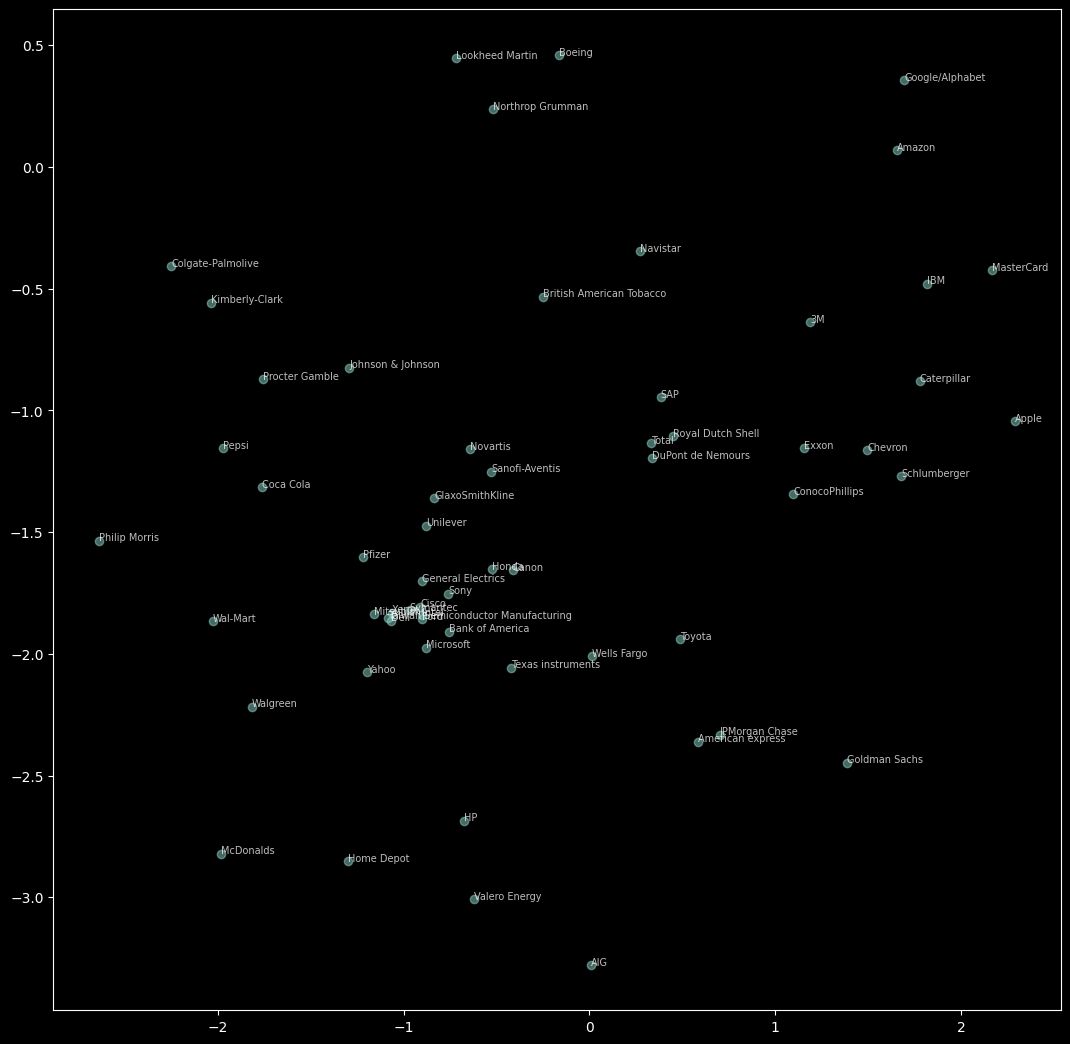

In [19]:
# scikit-learn imports used here
from sklearn.manifold import  TSNE

# create model: model_TSNE
model_TSNE = TSNE(learning_rate=69)

# fit_transform seeds_array: tsne_features
tsne_features = model_TSNE.fit_transform(movements_array)

# select 0th feature: xs
xs = tsne_features[:, 0]
# select 1st feature: ys
ys = tsne_features[:, 1]

# plot scatter plot of xs and ys, coloring with varieties_array
plt.figure(figsize=(13, 13))
plt.scatter(x=xs, y=ys, alpha=0.5)

# annotate scatterplot points with companies_array
for x, y, company in zip(xs, ys, companies_array):
    plt.annotate(company, (x, y), fontsize=7, alpha=0.75)

# show plot
plt.show()

# **3. Decorrelating Data and Dimension Reduction**

---
- **Dimension Reduction** (or *Dimensionality Reduction*) is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction. Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature extraction is the process of transforming the data into a new feature space, often with the goal of reducing the dimensionality of the data while retaining as much information as possible.
    - <u>Key Concepts</u>
        - **Dimensions** (i.e. *features*): The number of variables or attributes in a dataset that are used to describe each observation, or, in simpler terms, the columns of a dataset.
        - "**The *Curse* of Dimensionality**" (i.e. *spooky* &#128123;): The phenomenon where the volume of the space increases so fast that the available data become sparse., leading to overfitting  and poor generalization performance in machine learning models--such that a model may show exceptional performance against the training data, yet fails against real world data it has never "seen".
    -  <u>Benefits?</u>
        - **Data Compression**: Reducing the number of dimensions can help in compressing data, making it easier to store and process.
        - **Noise Reduction**: By focusing on the most important features, PCA can help in reducing noise and irrelevant information.
        - **Visualization**: PCA can help in visualizing high-dimensional data in 2D or 3D, making it easier to understand patterns and relationships.
        - **Model Training**: Reducing the dimensionality can speed up model training and improve computational efficiency.

## Visualizing the Principal Component Analysis ("PCA") Transformation

---
- **PCA**  is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.
    - The word soup above basically means that PCA realigns/rotates the data to be aligned with the axes (which are at right angles to each other, thus, "orthogonal") and shifts the data to be centered around the origin (i.e. they have a mean of `0`).

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---


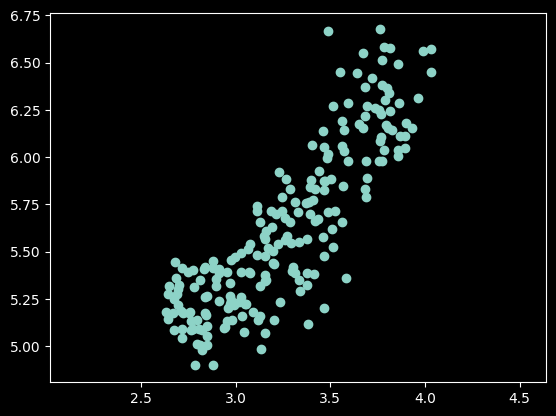

0.8604149377143469


In [8]:
# this uses the pearsonr function of scipy.stats
from scipy.stats import pearsonr

# create wl_df from `seeds-width-vs-length.csv`
wl_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_unsupervised_learning/Grains/seeds-width-vs-length.csv')

# assign 0th column: width
width = wl_df['width']
# assign 1st column: length
length = wl_df['length']

# plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# print the correlation
print(correlation)

- Seems like there's a fairly strong correlation (values of `0.7` to `1.0` or values of `-0.7` to `-1.0`--we deal in absolutes here, Obi &#128294;)

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---


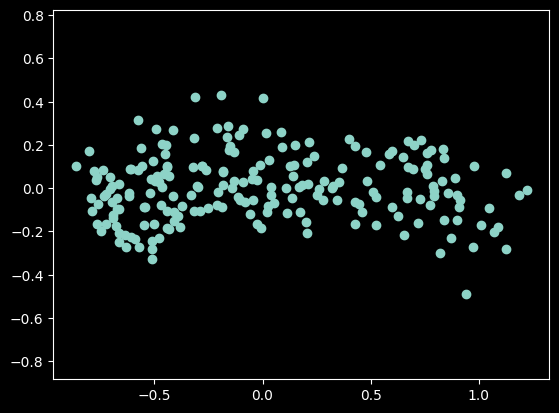

2.2860185966422364e-14


In [9]:
# scikit-learn imports used here
from sklearn.decomposition import PCA

# create an instance of PCA: model_PCA
model_PCA = PCA()

# fit and transform wl_df with model_PCA: pca_features
pca_features = model_PCA.fit_transform(wl_df)

# assign 0th column: xs
xs = pca_features[:, 0]
# assign 1st column: ys
ys = pca_features[:, 1]


# plot it already, Kid!: xs vs. ys, obviously....
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()


# now what does Mr. Pearson have to say?: correlation, pvalue
correlation, pvalue = pearsonr(xs, ys)

# you gotta print it if you want to know what he said, Kid. Duh!
print(correlation)

- We pimped yo' correlation into oblivion and obscurity &#128642;

### <u>Put in Yer Bets!</u>

![Principal Component Clouds](notebook_images/scikit-learn_unsupervisedLearning/pc_clouds.svg)

---
- Three scatter plots of the same point cloud are shown. Each scatter plot shows a different set of axes (in red).
- In which of the plots could the axes represent the principal components of the point cloud?
- Recall that the principal components are the directions along which the the data varies.

    - Is it `Plot1`, maybe Sir `Plot 2`, and what about this `Plot 3`? HEY!!!! What if it's multiple? What if you're single....FOREVER &#128126; 	&#128566;
 <br><br>
![Never Not Once Ever](notebook_images/scikit-learn_unsupervisedLearning/neverEVER.jpg)
---
### **TIMES UP!!!!**


---
It's `Plot 1` and `Plot 3`....so, maybe you won't be single forever &#128571;
<br><br>
![Determinism Chooses Demons](notebook_images/scikit-learn_unsupervisedLearning/choices.jpg)